# The goal of this notebook is to visualize how the method work:

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

Synthetic data generation

In [2]:
n_samples = 100
n_outliers = 70
random_state = 42
cluster_data_points, _ = make_blobs(n_samples=n_samples, centers=3, cluster_std=0.95, random_state=random_state)
outliers = np.random.uniform(low=-10, high=10, size=(n_outliers, 2))

In [3]:
type(outliers)

numpy.ndarray

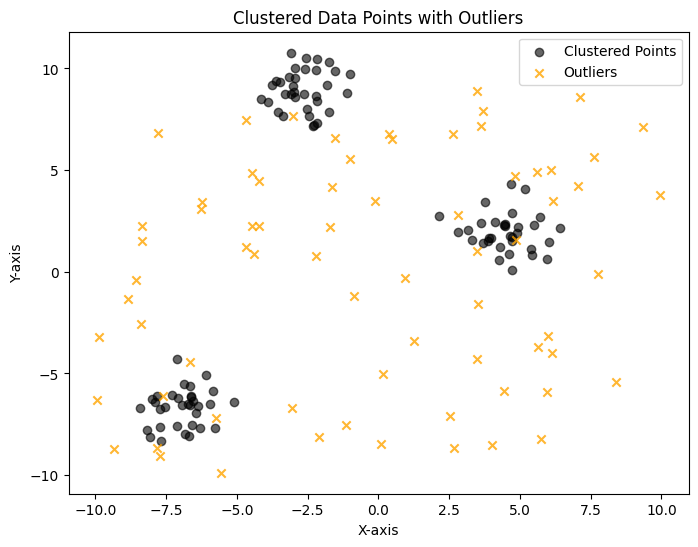

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(cluster_data_points[:, 0], cluster_data_points[:, 1], color='black', label='Clustered Points', alpha=0.6)
plt.scatter(outliers[:, 0], outliers[:, 1], color='orange', marker='x', label='Outliers', alpha=0.8)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Clustered Data Points with Outliers")
plt.legend()
plt.show()

RMK: "The idea is tou don't know the outliers within the dataset"

In [5]:
noisy_data = np.vstack((cluster_data_points, outliers))
noisy_data[0].shape
#outliers[0].shape

(2,)

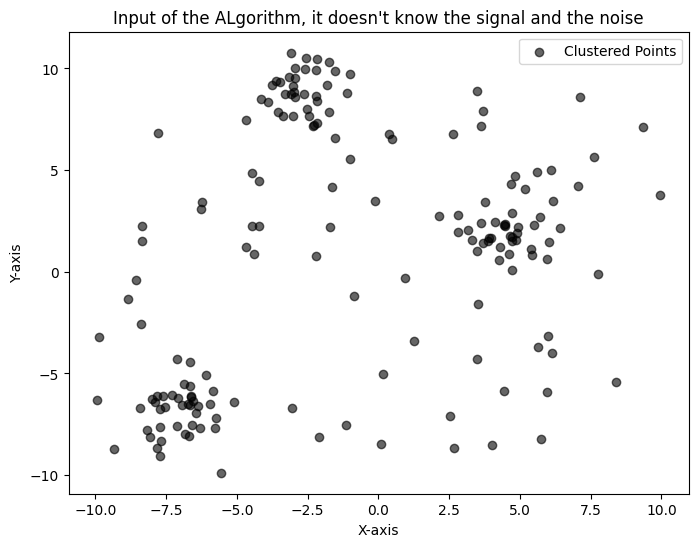

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(noisy_data[:, 0], noisy_data[:, 1], color='black', label='Clustered Points', alpha=0.6)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Input of the ALgorithm, it doesn't know the signal and the noise")
plt.legend()
plt.show()

Import the built in library

In [7]:
import os
os.chdir("..")
print(os.getcwd())
from similarity_based_clustering.utils import largest_clusters
from similarity_based_clustering.mountain_method import mountain_method
from similarity_based_clustering.minimum_covariance_determinant import mcv_robust_clustering

c:\Users\Nicola_Petkovic\Documents\novelContribution\RobustClustering


Hyperparameters

In [8]:
epsilon = 1.0
radius = 1.0
p = 1.0
minimum_data_points = 10
support_fraction = 0.4
largest = True  # Change to False to test the other branch

In [9]:
list_of_phi = list()
list_of_o_tilde = list()
centers = mountain_method(outliers=noisy_data, epsilon=epsilon, radius=radius, p=p)
list_of_o_tilde = largest_clusters(centers=centers.tolist(), outliers=noisy_data, epsilon=epsilon)
for o_tilde in list_of_o_tilde:
    phi = mcv_robust_clustering(cluster=o_tilde, minimum_datapoints=minimum_data_points,support_fraction=support_fraction)
    list_of_phi.append(phi)

In [10]:
len(list_of_o_tilde)

1

# RMK: notice the difference in the shape 

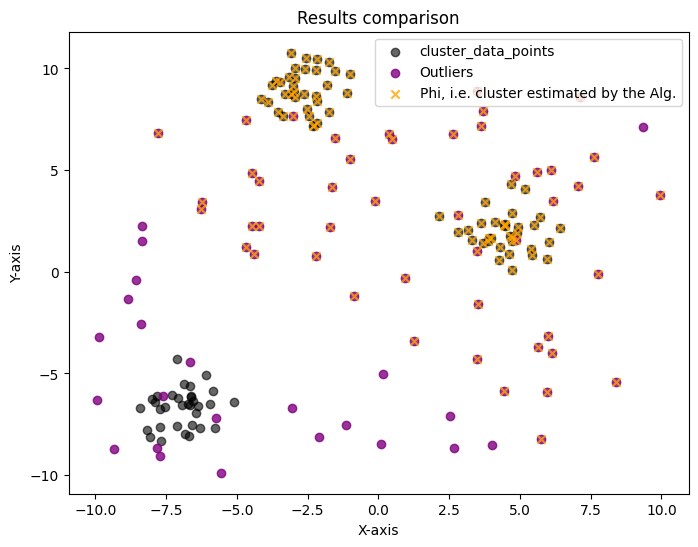

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(cluster_data_points[:, 0], cluster_data_points[:, 1], color='black', label='cluster_data_points', alpha=0.6)
plt.scatter(outliers[:, 0], outliers[:, 1], color='purple', label='Outliers', alpha=0.8)
plt.scatter(phi[:, 0], phi[:, 1], color='orange', marker='x', label='Phi, i.e. cluster estimated by the Alg.', alpha=0.8)


plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Results comparison")
plt.legend()
plt.show()